<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Dataset

# Data preparation

## Download data

In [22]:
#Download the file
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2021-09-14 13:37:50--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.007s  

2021-09-14 13:37:51 (7.19 MB/s) - ‘insurance.csv’ saved [54288/54288]



In [23]:
import pandas as pd

#Read in as pandas dataframe
insurance = pd.read_csv("/content/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## One hot encode data

In [24]:
# Turn non-numerical columns into number
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [25]:
#Get info about the dataframe
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [29]:
insurance_one_hot.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
x.shape, y.shape

((1338, 11), (1338,))

## Split data

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Modelling experiments

In [35]:
def plot_regression_training_curve(history):
  import matplotlib.pyplot as plt

  mae = history.history["mae"]
  val_mae = history.history["val_mae"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  mse = history.history["mse"]
  val_mse = history.history["val_mse"]
  
  plt.figure(figsize=(10,7))
  plt.plot(mae, label="mae")
  plt.plot(val_mae, label="val_mae")
  plt.legend()
  plt.title("mae")

  plt.figure(figsize=(10,7))
  plt.plot(mse, label="mse")
  plt.plot(val_mse, label="val_mse")
  plt.legend()
  plt.title("mse")

  plt.figure(figsize=(10,7))
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.legend()
  plt.title("Loss")

## Model 0: Dense

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(1)(inputs)
outputs = layers.Dense(1)(x)
model_0 = tf.keras.Model(inputs, outputs)

In [42]:
# Compile the model 
model_0.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [ ]:
# Fit the model 
history_model_0 = model_0.fit(x_train, y_train, 
                              epochs=100, 
                              validation_data=(x_test, y_test))

In [44]:
# Evaluate
model_0.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12891.8809 - mae: 12891.8818 - mse: 321378624.0000


[12891.880859375, 12891.8818359375, 321378624.0]

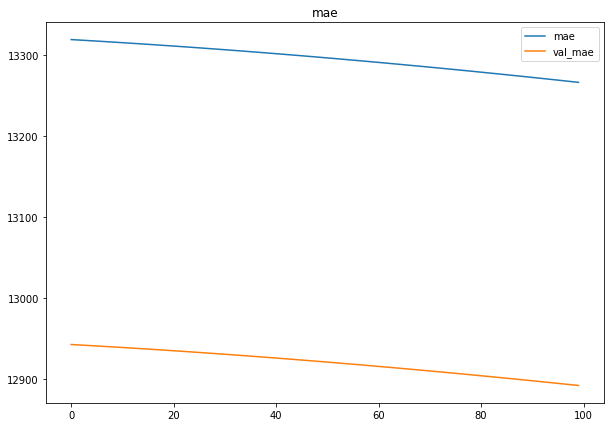

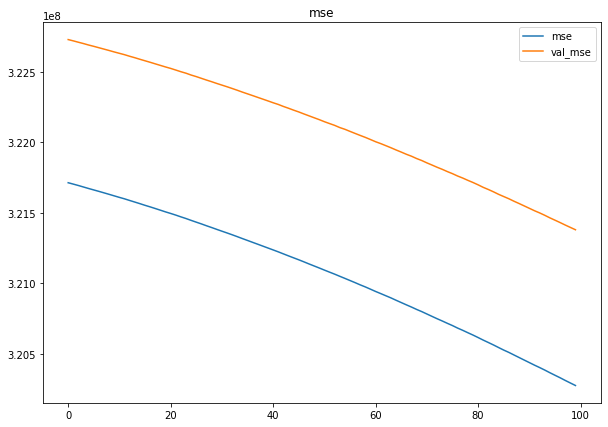

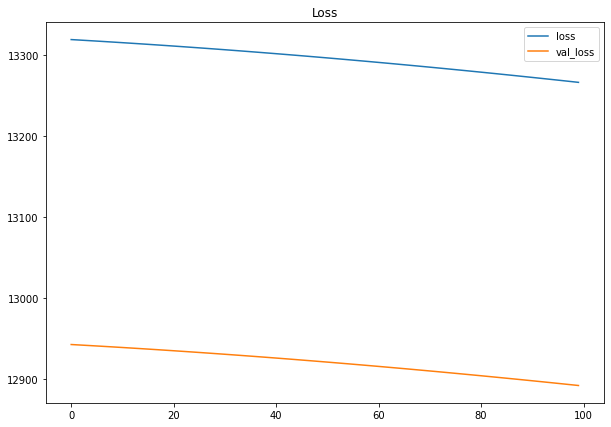

In [45]:
plot_regression_training_curve(history_model_0)

## Model 1: Dense advanced

In [46]:
tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(128)(inputs)
x = layers.Dense(64)(x)
x = layers.Dense(32)(x)
outputs = layers.Dense(1)(x)
model_1 = tf.keras.Model(inputs, outputs)

In [47]:
# Compile the model 
model_1.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [48]:
# Fit the model 
history_model_1 = model_1.fit(x_train, y_train, 
                              epochs=500,
                              verbose=0, 
                              validation_data=(x_test, y_test))

In [49]:
#Evaluate
model_1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3176.3550 - mae: 3176.3550 - mse: 44131212.0000


[3176.35498046875, 3176.35498046875, 44131212.0]

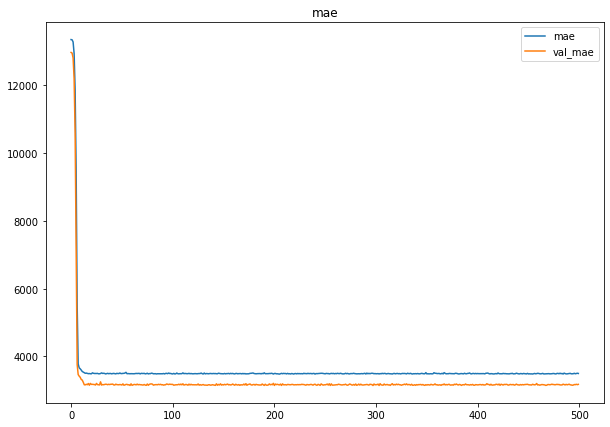

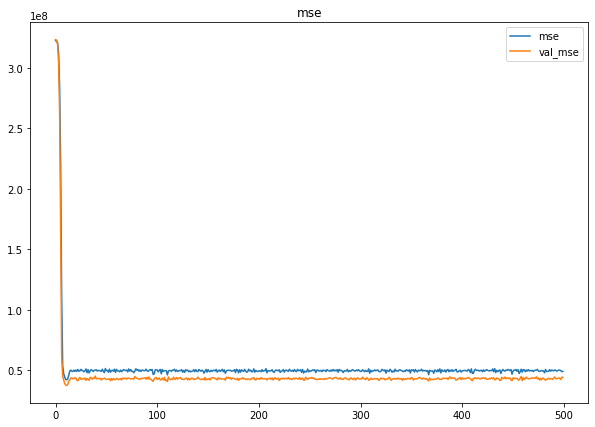

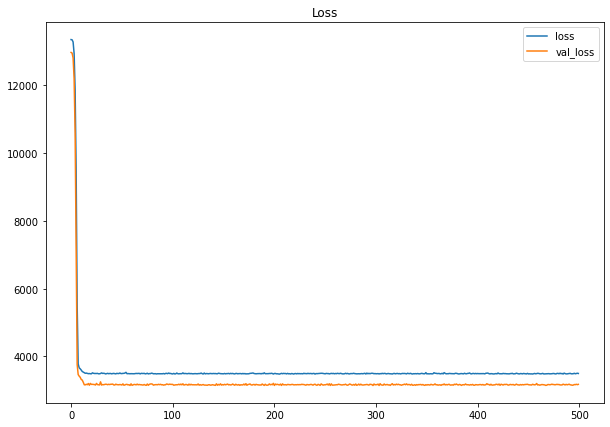

In [50]:
plot_regression_training_curve(history_model_1)

## Normalize data

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create column transformer for preprocessing our data
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [ ]:
#Create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [ ]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#Fit column transformer
ct.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
#Transform train and test data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train_normal

In [ ]:
x_train_normal.max(), x_train_normal.min()

(1.0, 0.0)

## Model 2: Dense advanced normalized

In [ ]:
tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(64)(inputs)
x = layers.Dense(64)(x)
#x = layers.Dense(32)(x)
outputs = layers.Dense(1)(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model 
model_2.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [ ]:
# Fit the model 
history_model_2 = model_2.fit(x_train_normal, y_train, 
                              epochs=500,
                              verbose=0,
                              validation_data=(x_test_normal, y_test),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

In [ ]:
#Evaluate
model_2.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3159.4534 - mae: 3159.4534 - mse: 43080720.0000


[3159.453369140625, 3159.453369140625, 43080720.0]

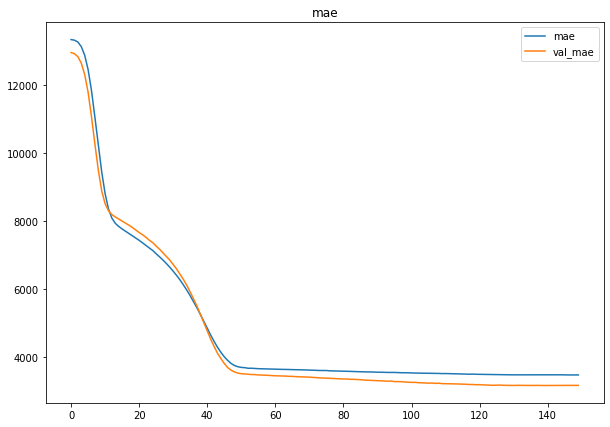

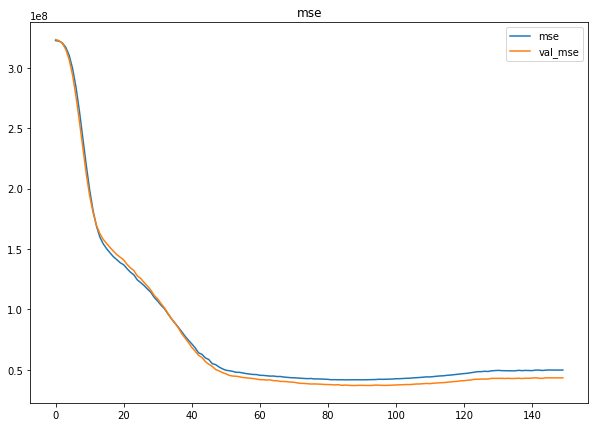

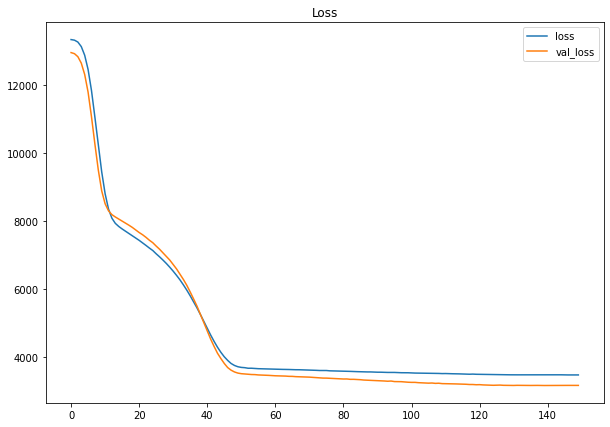

In [ ]:
plot_regression_training_curve(history_model_2)

## Model 3

In [ ]:
tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(12, activation="relu")(inputs)
x = layers.Dense(10, activation="relu")(x)
x = layers.Dense(8, activation="relu")(x)
x = layers.Dense(2, activation="relu")(x)
outputs = layers.Dense(1)(x)
model_3 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model 
model_3.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [ ]:
# Fit the model 
history_model_3 = model_3.fit(x_train_normal, y_train, 
                              epochs=1000,
                              verbose=0,
                              validation_data=(x_test_normal, y_test),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

In [ ]:
#Evaluate
model_3.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2859.2297 - mae: 2859.2297 - mse: 42714940.0000


[2859.229736328125, 2859.229736328125, 42714940.0]

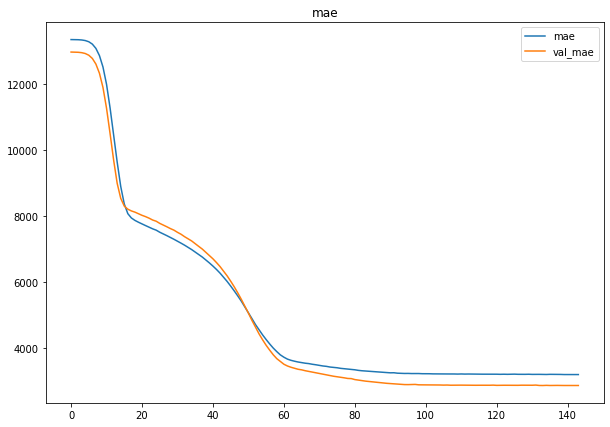

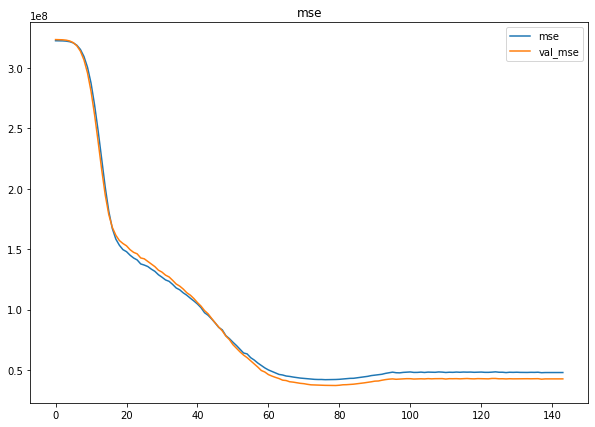

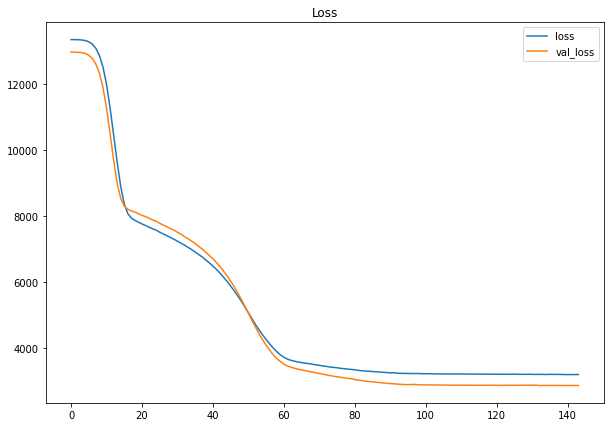

In [ ]:
plot_regression_training_curve(history_model_3)

# Boston Housing Dataset 

## Data preparation

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [11]:
#Turn into pandas dataframe
import pandas as pd
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = pd.DataFrame(data=boston.target) 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#Get info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
#Check for missing data
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Normalize and split data

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create column transformer for preprocessing our data
ct = make_column_transformer(
    (MinMaxScaler(), ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
)

In [56]:
#Split data into train and test set 
train_dataset = data.sample(frac=0.7,random_state=42)
test_dataset = data.drop(train_dataset.index)

In [57]:
len(train_dataset), len(test_dataset)

(354, 152)

In [58]:
x_train = train_dataset.drop("MEDV", axis=1)
y_train = train_dataset["MEDV"]

x_test = test_dataset.drop("MEDV", axis=1)
y_test = test_dataset["MEDV"]

In [59]:
ct.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                  'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                  'LSTAT'])],
                  verbose=False)

In [60]:
#Transform train and test data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [65]:
x_train_normal.shape, x_test_normal.shape

((354, 13), (152, 13))

In [70]:
x_train_normal[:5]

array([[9.60549795e-04, 0.00000000e+00, 1.31598240e-01, 0.00000000e+00,
        2.57201646e-01, 5.47039663e-01, 8.36251287e-01, 1.37340188e-01,
        1.73913043e-01, 2.08015267e-01, 4.25531915e-01, 9.96469817e-01,
        1.85070423e-01],
       [5.63336716e-04, 4.00000000e-01, 2.18108504e-01, 1.00000000e+00,
        1.27572016e-01, 6.12569458e-01, 3.08959835e-01, 2.67582693e-01,
        1.30434783e-01, 1.27862595e-01, 5.31914894e-01, 1.00000000e+00,
        2.98591549e-02],
       [1.11745683e-03, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        4.60905350e-01, 4.64073577e-01, 9.87641607e-01, 6.65271395e-02,
        1.30434783e-01, 1.00000000e+00, 7.97872340e-01, 9.82878612e-01,
        4.39436620e-01],
       [9.58976229e-04, 0.00000000e+00, 3.79398827e-01, 0.00000000e+00,
        5.76131687e-02, 4.79785400e-01, 5.04634398e-02, 3.77660494e-01,
        1.30434783e-01, 2.25190840e-01, 7.02127660e-01, 9.84895860e-01,
        8.59154930e-02],
       [5.71412483e-02, 0.00000000e+

In [71]:
x_test_normal[:5]

array([[2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48523591e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 1.00000000e+00,
        1.87887324e-01],
       [7.05070075e-04, 0.00000000e+00, 6.30498534e-02, 0.00000000e+00,
        1.50205761e-01, 6.87104809e-01, 5.28321318e-01, 4.48173256e-01,
        8.69565217e-02, 6.67938931e-02, 6.48936170e-01, 1.00000000e+00,
        8.05633803e-02],
       [2.30325139e-03, 1.25000000e-01, 2.71627566e-01, 0.00000000e+00,
        2.86008230e-01, 3.96627706e-01, 1.00000000e+00, 4.49984076e-01,
        1.73913043e-01, 2.36641221e-01, 2.76595745e-01, 9.74103586e-01,
        7.73521127e-01],
       [7.00731528e-03, 0.00000000e+00, 2.81524927e-01, 0.00000000e+00,
        3.14814815e-01, 4.57558919e-01, 6.06591143e-01, 3.24901042e-01,
        1.30434783e-01, 2.29007634e-01, 8.93617021e-01, 1.00000000e+00,
        1.63098592e-01],
       [7.09948131e-03, 0.00000000e+

## Modelling experiments

### Model 0: Dense

In [74]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(13,))
x = layers.Dense(1)(inputs)
outputs = layers.Dense(1)(x)
model_0 = tf.keras.Model(inputs, outputs)

In [75]:
# Compile the model 
model_0.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [76]:
# Fit the model 
history_model_0 = model_0.fit(x_train_normal, y_train, 
                              epochs=100,
                              verbose=0,
                              validation_data=(x_test_normal, y_test))

In [77]:
# Evaluate
model_0.evaluate(x_test_normal, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 8.3518 - mae: 8.3518 - mse: 124.3587


[8.351759910583496, 8.351759910583496, 124.35869598388672]

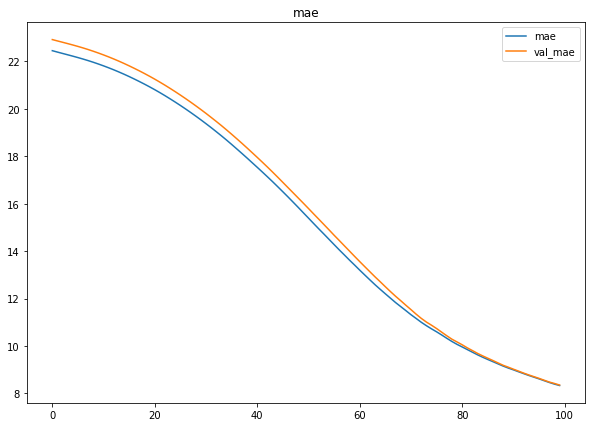

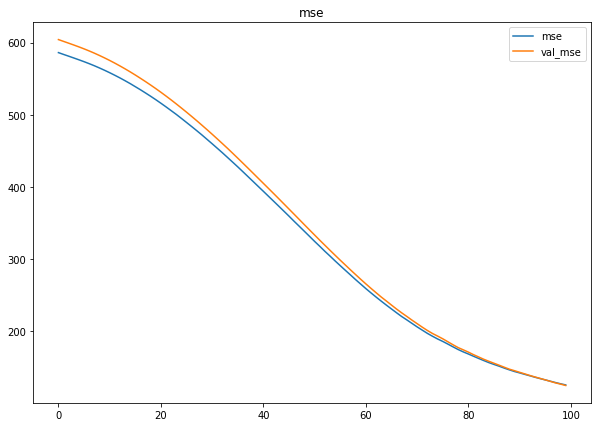

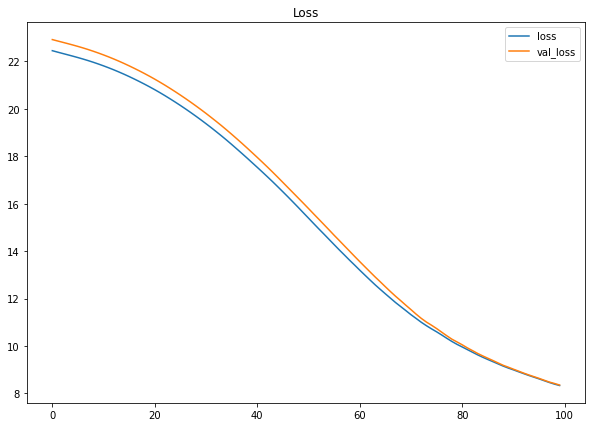

In [78]:
plot_regression_training_curve(history_model_0)

### Model 1: Dense advanced 

In [80]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(13,))
x = layers.Dense(6, activation="relu")(inputs)
x = layers.Dense(3, activation="relu")(x)
outputs = layers.Dense(1)(x)
model_1 = tf.keras.Model(inputs, outputs)

In [81]:
# Compile the model 
model_1.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [82]:
# Fit the model 
history_model_1 = model_1.fit(x_train_normal, y_train, 
                              epochs=100,
                              verbose=0,
                              validation_data=(x_test_normal, y_test))

In [83]:
# Evaluate
model_1.evaluate(x_test_normal, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 4.4807 - mae: 4.4807 - mse: 44.4834


[4.480667591094971, 4.480667591094971, 44.483402252197266]

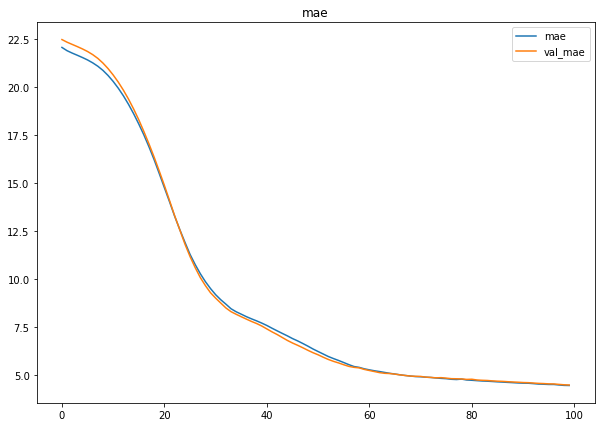

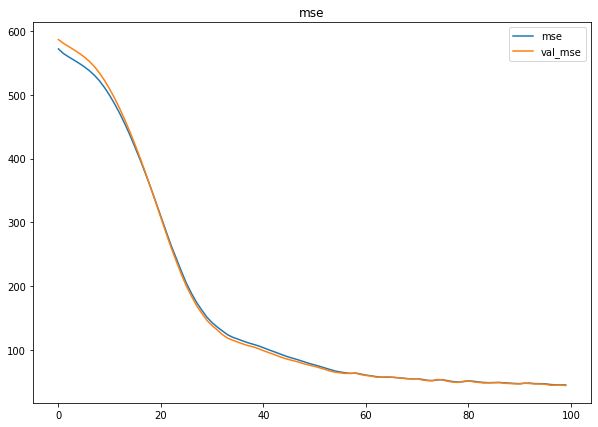

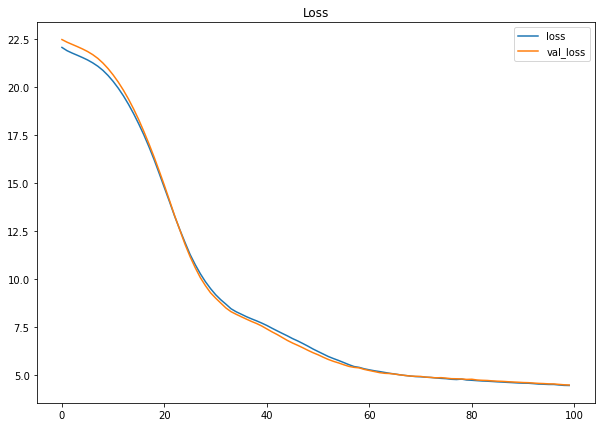

In [84]:
plot_regression_training_curve(history_model_1)